#**Machine Learning-Based Heart Disease Prediction: A Comprehensive Study**


#**Input Data**

Data yang digunakan adalah dataset "heart" yang berisi informasi mengenai pasien, apakah mereka menderita penyakit jantung atau tidak.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/drive/', force_remount=True)

Mounted at /drive/


In [ ]:
cd/drive/My\ Drive/Colab\ Notebooks/File

/drive/My Drive/Colab Notebooks/File


In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#**Exploratory Data Analysis**


Exploratory Data Analysis (EDA) merupakan proses analisis awal data yang bertujuan untuk memahami karakteristik, struktur, dan pola penting dalam dataset sebelum melakukan analisis statistik atau pemodelan prediktif lebih lanjut.

## Mengelaborasi Features dan Tipe Data

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Mengelaborasi kolom-kolom yang ada pada dataset heart sebagai berikut:
1. Kolom `age`, tipe data **numerik**. Berisi data-data mengenai usia pasien (tahun).
2. Kolom `sex`, tipe data **nominal**. Berisi data-data mengenai jenis kelamin pasien (1: laki-laki, 0: perempuan).
3. Kolom `cp`, tipe data **nominal**. Berisi data-data tipe nyeri dada (4 nilai, yaitu 0, 1, 2, 3).
4. Kolom `trestbps`, tipe data **numerik**. Berisi data-data mengenai tekanan darah saat istirahat (mmHg).
5. Kolom `chol`, tipe data **numerik**. Berisi data-data mengenai kadar kolesterol serum (mg/dL).
6. Kolom `fbs`, tipe data **nominal**. Berisi data-data mengenai gula darah pasien, atribut fbs ini hanya memiliki 2 nilai yaitu 1 jika kadar gula darah pasien lebih dari 120 mg/dl, dan 0 jika kadar gula darah pasien kurang dari
sama dengan 120 mg/dL.
7. Kolom `restecg`, tipe data **nominal**. Berisi data kondisi ECG pasien ketika dalam keadaan istirahat (nilai 0,1,2).
8. Kolom `thalach`, tipe data **numerik**. Berisi data-data mengenai denyut jantung maksimum yang dicapai.
9. Kolom `exang`, tipe data **nominal**. Berisi data-data mengenai nyeri data saat berolahraga (1: ya, 0: tidak).
10. Kolom `oldpeak`, tipe data **numerik**. Berisi data-data mengenai depresi ST (mm)
11. Kolom `slope`, tipe data **nominal**. Berisi data-data mengenai kemiringan segmen ST (nilai 0, 1, 2)
12. Kolom `ca`, tipe data **nominal** karena terdiri dari nilai unik sebanyak sama dengan atau kurang dari 5 sehigga digolongkan sebagai data kategorik. Berisi data-data mengenai jumlah pembuluh darah koroner utama yang diwarnai oleh flourosopi (0 - 4).
13. Kolom `thal`, tipe data **nominal**. Berisi data-data mengenai jenis thalasemia (1= normal, 2= fixed defect, 3= reversable defect).
14. Kolom `target`, tipe data **nominal**. Berisi data-data mengenai ada tidaknya penyakit jantung (0: tidak, 1:ya).

##Mencari Nilai Mean, Median, dan Modus

In [ ]:
data_num = heart[['age', 'trestbps', 'chol', 'oldpeak', 'thalach']]
data_cat = heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca','target']]

In [ ]:
data_num.describe()

,age,trestbps,chol,oldpeak,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,1.071512,149.114146
std,9.072290,17.516718,51.59251,1.175053,23.005724
min,29.000000,94.000000,126.00000,0.000000,71.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000
50%,56.000000,130.000000,240.00000,0.800000,152.000000
75%,61.000000,140.000000,275.00000,1.800000,166.000000
max,77.000000,200.000000,564.00000,6.200000,202.000000


In [ ]:
data_cat.mode()

,sex,cp,fbs,restecg,exang,slope,thal,ca,target
0,1,0,0,1,0,1,2,0,1


Berdasarkan output diatas dapat diperoleh beberapa informasi, sesuai penggunaan mean, median, dan modus, sebagai berikut:
1.   Nilai mean (rata-rata) dari variabel `age` sebesar 54,434.
2.   Nilai median (nilai tengah) dari variabel `trestbps`= 130, `chol`= 240, `oldpeak`= 0,8, dan `thalach`= 152.
3. Nilai modus dari variabel `sex`= 1 (male), `cp` = 0 (angina), `fbs`= 0 (gula darah < 120 mg/dL), `restecg`= 1 (tekanan darah sistolik), `exang`= 0 (tidak mengalami exercise induced angina), `slope`= 1 (dengan slope), `thal`= 2 (reversable defect), `ca`= 0 (tidak ditemukan adanya pembuluh darah utama yang tersumbat), dan `target`= 1 (terindikasi penyakit jantung).

##Statistical Five Summaries

Statistical five summaries merupakan dari statistik deskriptif yang memberikan gambaran singkat tentang distribusi data, terutama untuk data numerik. Statistical five summaries terdiri dari minimum, kuartil pertama (Q1), median (Q2), kuartil ketiga (Q3), dan maksimum serta hanya akan diterapkan untuk kolom numerik.

In [ ]:
data_num.describe()

,age,trestbps,chol,oldpeak,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,1.071512,149.114146
std,9.072290,17.516718,51.59251,1.175053,23.005724
min,29.000000,94.000000,126.00000,0.000000,71.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000
50%,56.000000,130.000000,240.00000,0.800000,152.000000
75%,61.000000,140.000000,275.00000,1.800000,166.000000
max,77.000000,200.000000,564.00000,6.200000,202.000000


Berdasarkan output diatas dapat diperoleh beberapa hal sebagai berikut:

1. Kolom `age` menginformasikan bahwa usia terendah pasien dalam dataset adalah 29 tahun (**minimum= 29**), 25% pasien memiliki usia di bawah 48 tahun (**Q1= 48**),  50% pasien memiliki usia di bawah 56 tahun (**median= 56**), 75% pasien memiliki usia di bawah 61 tahun (**Q3= 61**), dan usia tertinggi pasien dalam dataset adalah 77 tahun(**maksimum= 77**).
2. Kolom `trestbps` menginformasikan bahwa tekanan darah terendah pasien dalam dataset adalah 94 mmHg (**minimum= 94**), 25% pasien memiliki tekanan darah di bawah 120 mmHg (**Q1= 120**),  50% pasien memiliki tekanan darah di bawah 130 mmHg (**median= 130**), 75% pasien  memiliki tekanan darah di bawah 140 mmHg (**Q3= 140**), dan tekanan darah tertinggi pasien dalam dataset adalah 200 mmHg(**maksimum= 200**).
3. Kolom `chol` menginformasikan bahwa kadar kolesterol terendah pasien dalam dataset adalah 126 mg/dL (**minimum= 126**), 25% pasien memiliki kadar kolesterol di bawah 211 mg/dL (**Q1= 211**),  50% pasien memiliki kadar kolesterol di bawah 240 mg/dL (**median= 240**), 75% pasien  memiliki kadar kolesterol di bawah 275 mg/dL (**Q3= 275**), dan kadar kolesterol tertinggi pasien dalam dataset adalah 564 mg/dL(**maksimum= 564**).
4. Kolom `oldpeak` menginformasikan bahwa depresi ST-segment terendah pasien dalam dataset adalah 0 mm (**minimum= 0**), 25% pasien memiliki depresi ST-segment di bawah 0 mm (**Q1= 0**),  50% pasien memiliki depresi ST-segment di bawah 0,8 mm (**median= 0,8**), 75% pasien  memiliki depresi ST-segment di bawah 1,8 mm (**Q3= 1,8**), dan depresi ST-segment tertinggi pasien dalam dataset adalah 6,2 mm(**maksimum= 6,2**).
5. Kolom `thalach` menginformasikan bahwa denyut jantung terendah pasien dalam dataset adalah 71 bpm (**minimum= 81**), 25% pasien memiliki denyut jantung di bawah 132 bpm (**Q1= 132**),  50% pasien memiliki denyut jantung di bawah 152 bpm (**median= 152**), 75% pasien  memiliki denyut jantung di bawah 166 bpm (**Q3= 166**), dan denyut jantung tertinggi pasien dalam dataset adalah 202 bpm (**maksimum= 202**).

##Distribution Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###a. Distribusi Data Numerik

age


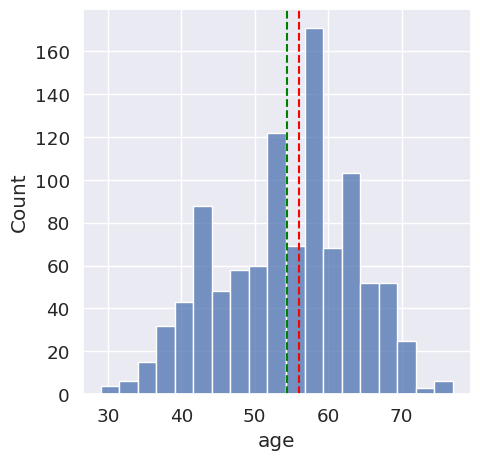

trestbps


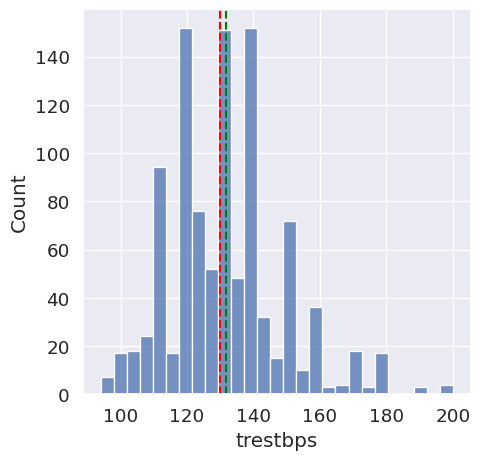

chol


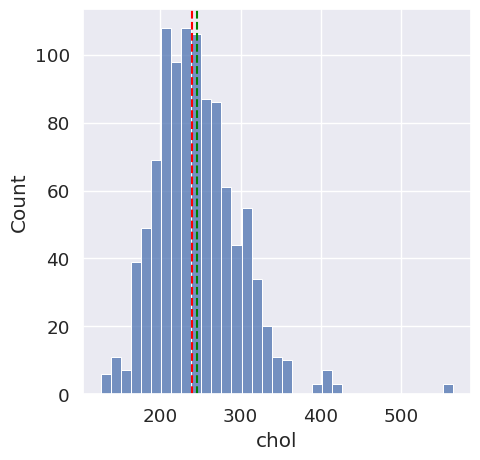

oldpeak


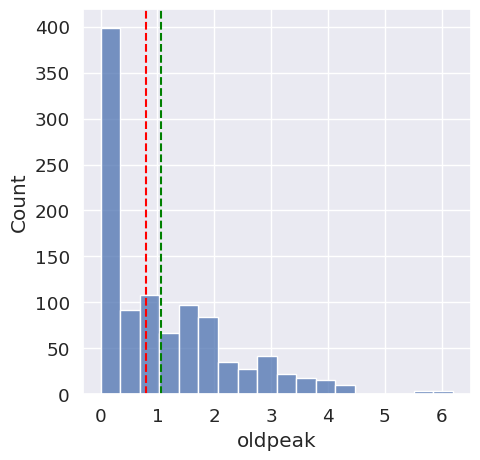

thalach


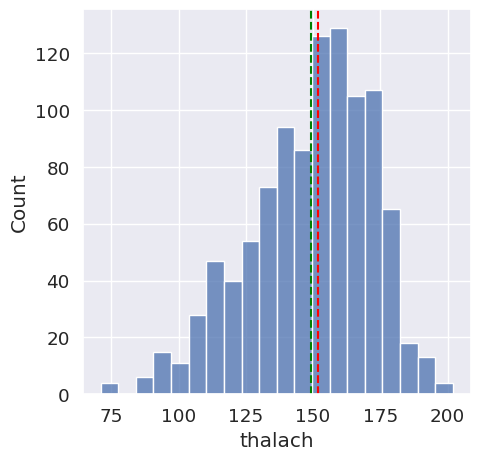

In [ ]:
#Histogram menggunakan seaborn matplotlib
for x in data_num.columns:
  print(x)

  plt.figure(figsize=(5,5))
  sns.set(font_scale=1.2)
  sns.histplot(heart[x])

  plt.axvline(np.mean(heart[x]), c='green', linestyle='--')
  plt.axvline(np.median(heart[x]), c='red', linestyle='--')

  plt.show()

**Interprestasi**,
Berdasarkan output histogram dan box-plot diatas maka dapat diketahui distribusi data disetiap variabel numeric, sebagai berikut:
1. Variabel `age`, memiliki distribusi data yang cenderung menjulur ke kiri atau tidak normal (skewness negatif atau left skewed).
2. Variabel `trestbps`, memiliki distribusi data yang cenderung menjulur ke kanan atau tidak normal (skewness positif atau right skewed).
3. Variabel `chol`, memiliki distribusi data yang cenderung menjulur ke kanan atau tidak normal (skewness positif atau right skewed).
4. Variabel `oldpeak`, memiliki distribusi data yang cenderung menjulur ke kanan atau tidak normal (skewness positif atau right skewed).
5. Variabel `thalach`, memiliki distribusi data yang cenderung menjulur ke kiri atau tidak normal (skewness negatif atau left skewed).

###b. Distribusi Data Kategorik

Untuk mengetahui distribusi untuk data kategorik dapat dilihat dari bar plot dan pie chart datanya.

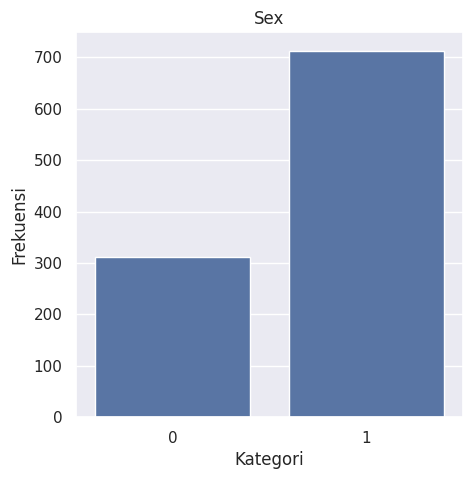

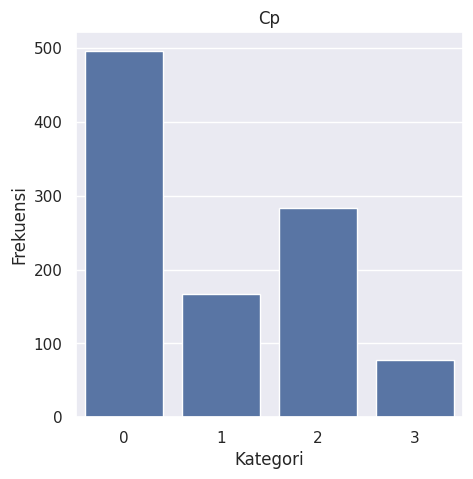

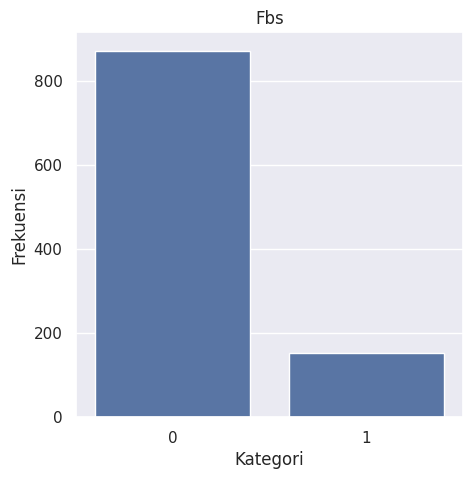

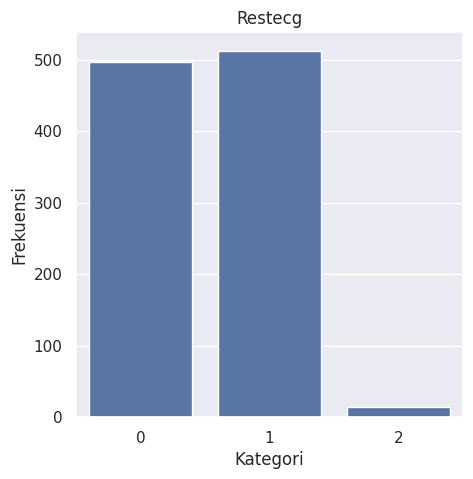

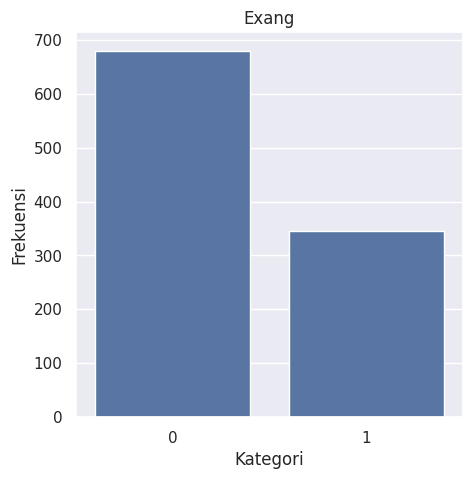

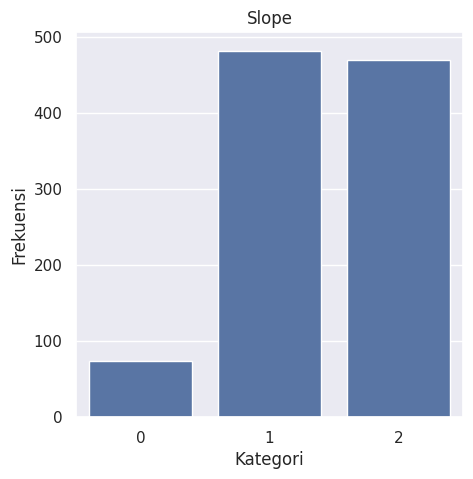

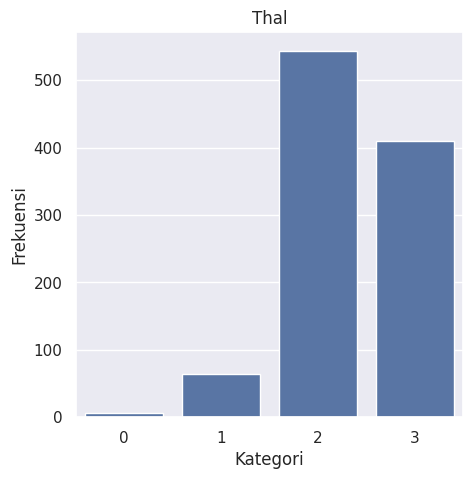

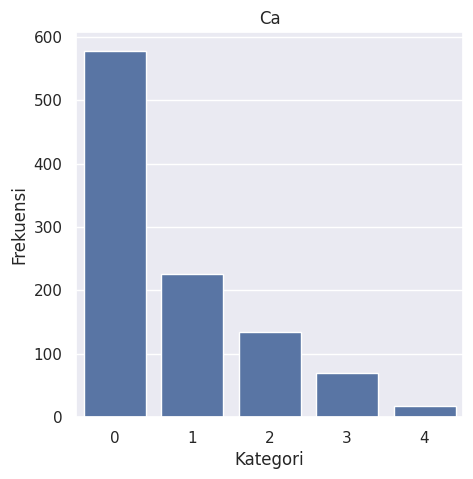

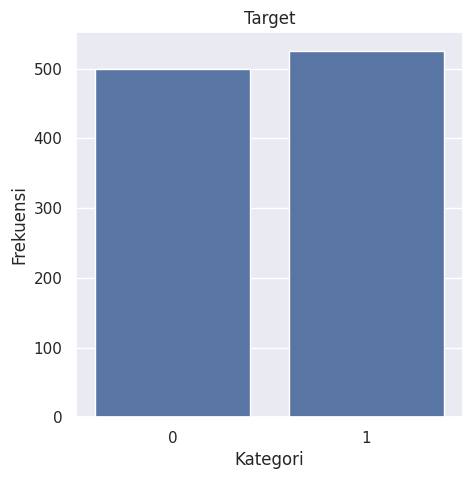

In [ ]:
data_cat= heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']]
#Bar plot
for x in data_cat.columns:
    plt.figure(figsize=(5, 5))
    sns.set(font_scale=1)
    sns.barplot(x=data_cat[x].value_counts().index, y=data_cat[x].value_counts())
    plt.title(x.capitalize())  # Menggunakan nama kolom sebagai judul
    plt.xlabel('Kategori')
    plt.ylabel('Frekuensi')
    plt.show()

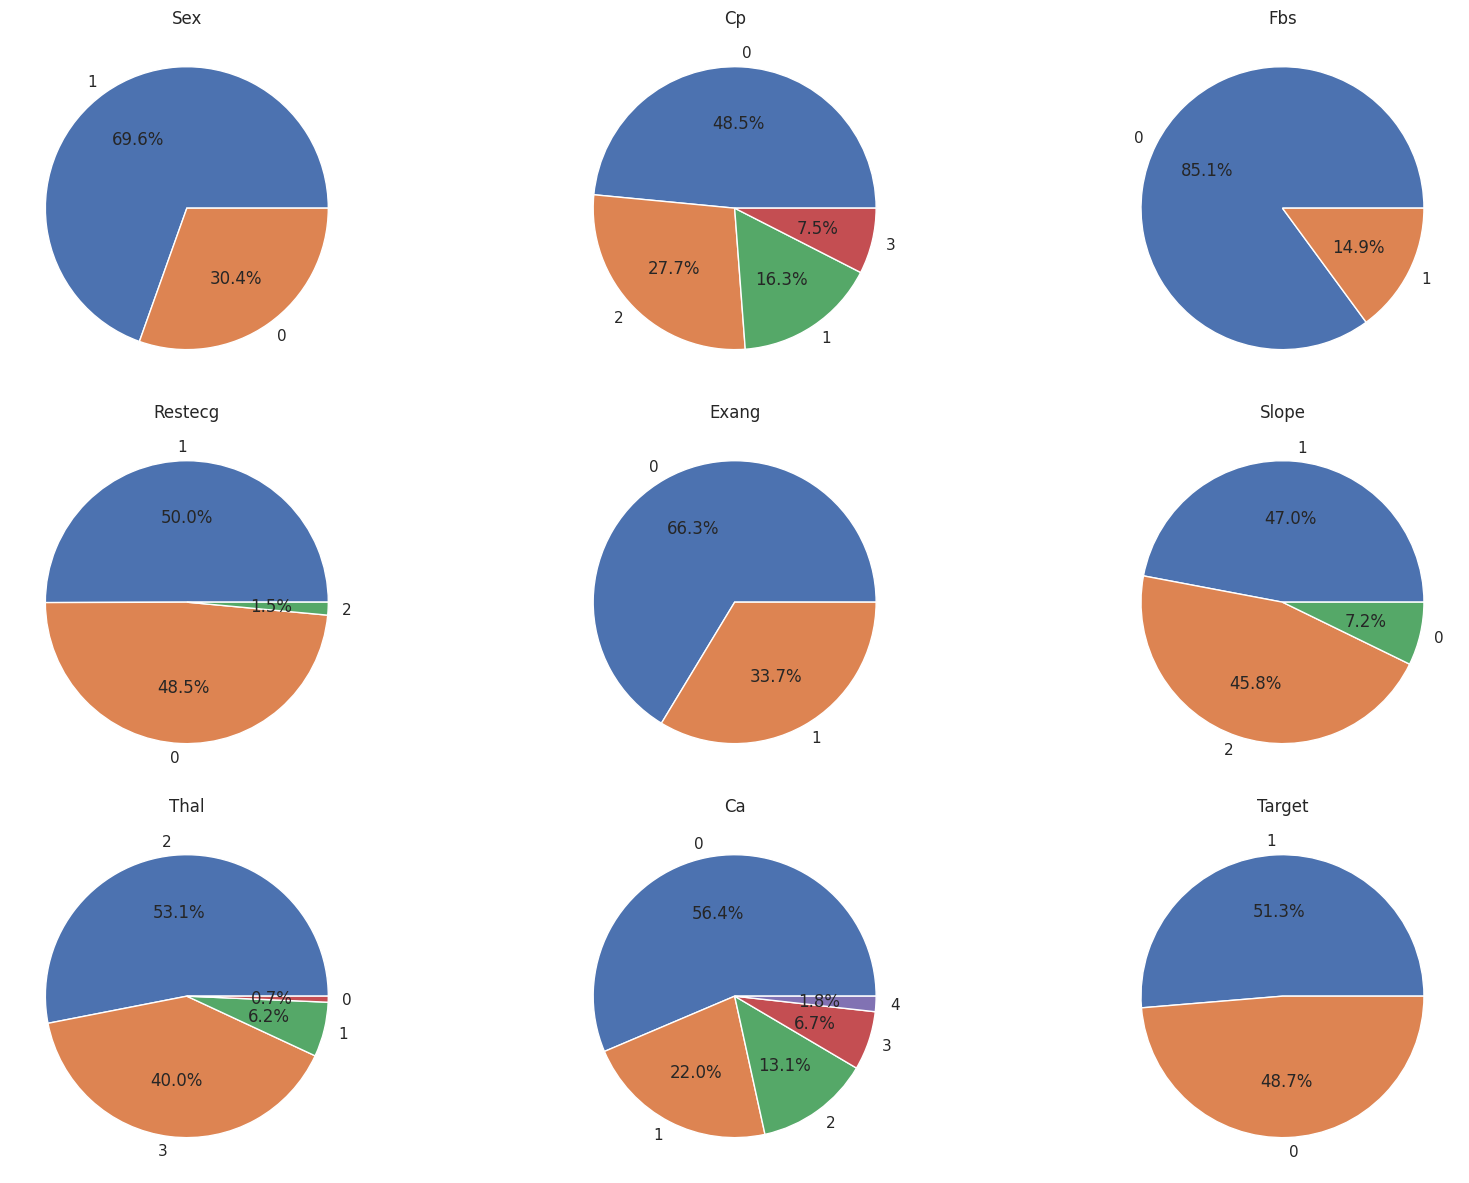

In [ ]:
#Pie Chart
kolom_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']

# Mengatur ukuran plot dan membuat subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Perulangan untuk membuat plot untuk setiap kolom
for i, col in enumerate(kolom_cat):
    row = i // 3
    col_mod = i % 3
    pie_data = heart[col].value_counts()
    axs[row, col_mod].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
    axs[row, col_mod].set_title(col.capitalize())

# Menyesuaikan layout plot dan menampilkannya
plt.tight_layout()
plt.show()

**Interprestasi**, Berdasarkan output bar plot dan pie chart diatas maka dapat diketahui distribusi data disetiap variabel kategorik, sebagai berikut:
1. Variabel `sex`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 30,4% dan kategori 1 = 69,6%.
2. Variabel `cp`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 48,5%, kategori 1 = 16,3%, kategori 2 = 27,7%,  dan kategori 3 = 7,5%.
3. Variabel `fbs`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 85,1% dan kategori 1 = 14,9%.
4. Variabel `restecg`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 48,5%, kategori 1 = 50% dan kategori 2 = 1,5%.  
5. Variabel `exang`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 66,3% dan kategori 1 = 33,7%.
6. Variabel `slope`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 7,2%, kategori 1 = 47% dan kategori 2 = 45,8%.
7. Variabel `thal`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 0,7%, kategori 1 = 6,2%, kategori 2 = 53,1%,  dan kategori 3 = 40%.
8. Variabel `ca`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 56,4%, kategori 1 = 22%, kategori 2 = 13,1%, kategori 3 = 6,7%, dan kategori 4 = 1,8%.
9. Variabel `target`, memiliki distribusi data yang **tidak simetris** atau data tidak terbagi secara merata disemua kategori. Dimana kategori 0 = 48,7% dan kategori 1 = 51,3%.

#**Data Preprocessing**

###A. Data Preparation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Duplicate Value: mengecek presentase data yang hilang
heart.isna().sum()/len(heart)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

**Interprestasi**: Berdasarkan output di atas, diketahui bahwa presentase missing value di setiap variabel sebesar 0, artinya tidak terdapat missing value pada dataset heart.

In [ ]:
#Mengecek apakah terdapat duplicate value
heart.duplicated().sum()

723

**Keterangan**: Dalam dataset "heart" tersebut tidak dicantumkan id dan nama pasien, sehingga tidak dapat diidentifikasi ada tidaknya data duplikat. Meskipun output menunjukan angka 723 tetapi hal tersebut kemungkinan dikarenakan ada beberapa pasien berbeda yang memiliki kondisi yang sama. Sehingga tidak dilakukan penanganan untuk data duplikat.

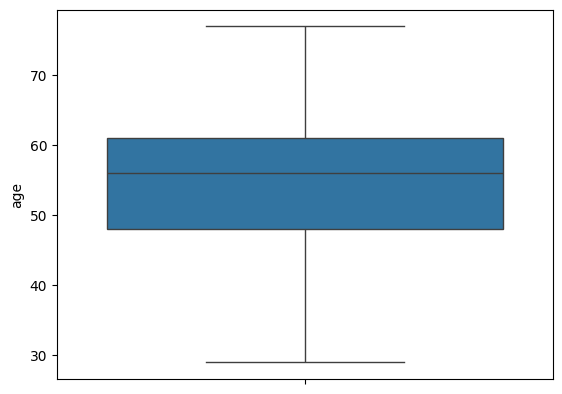

Batas Atas = 80.5
Batas Bawah = 28.5
Jumlah Outlier = 0
[]


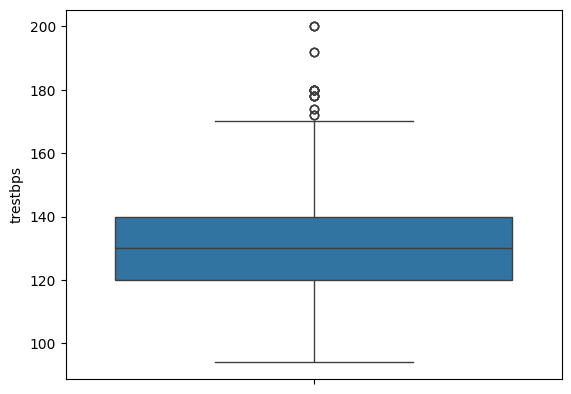

Batas Atas = 170.0
Batas Bawah = 90.0
Jumlah Outlier = 30
[180, 178, 174, 180, 192, 200, 178, 192, 180, 200, 192, 172, 180, 174, 178, 180, 200, 180, 178, 180, 178, 174, 180, 200, 172, 180, 178, 178, 172, 180]


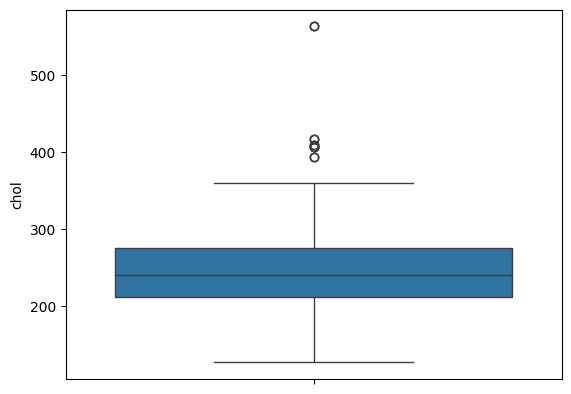

Batas Atas = 371.0
Batas Bawah = 115.0
Jumlah Outlier = 16
[417, 564, 409, 564, 394, 407, 564, 407, 394, 394, 409, 417, 407, 407, 417, 409]


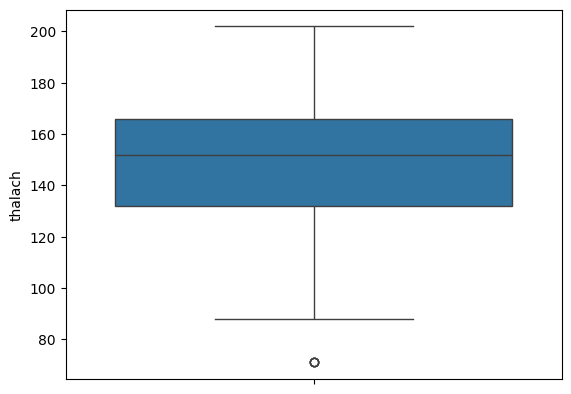

Batas Atas = 217.0
Batas Bawah = 81.0
Jumlah Outlier = 4
[71, 71, 71, 71]


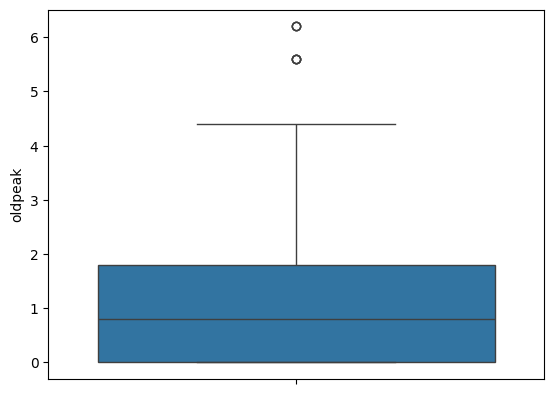

Batas Atas = 4.5
Batas Bawah = -2.7
Jumlah Outlier = 7
[5.6, 5.6, 6.2, 6.2, 6.2, 5.6, 5.6]


In [ ]:
#Mendeteksi ada tidaknya outlier
data_numeric = heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Fungsi untuk mendeteksi ada tidaknya outlier
def detect_outliers(data):
  for x in data.columns:
    # Box-plot
    sns.boxplot(data=data[x])
    plt.show()

    # Deteksi outlier
    q1 = np.percentile(data[x], 25)
    q3 = np.percentile(data[x], 75)
    iqr = q3 - q1

    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    print('Batas Atas = {}'.format(upper_fence))
    print('Batas Bawah = {}'.format(lower_fence))

    outlier = list(data[(data[x] < lower_fence) | (data[x] > upper_fence)][x])
    print('Jumlah Outlier = {}'.format(len(outlier)))
    print(outlier)

detect_outliers(data_numeric)

**Interprestasi**:

Berdasarkan output di atas dapat kita ketahui bahwa terdapat outlier dibeberapa pada variabel `trestbps`, `chol`, `thalach`, `oldpeak`. Sehingga perlu dilakukan handling outlier.

In [ ]:
def winsorize(data, lower_percentile, upper_percentile):
    winsorized_data = {}
    for x in data.columns:
      lower_bound = np.percentile(data[x], lower_percentile)
      upper_bound = np.percentile(data[x], upper_percentile)
      winsorized_data[x] = np.clip(data[x], lower_bound, upper_bound)
    return pd.DataFrame(winsorized_data)

In [ ]:
data_outlier = heart[['trestbps', 'chol' , 'thalach' , 'oldpeak']]
data_clean = winsorize(data_outlier, 5, 95) # menggunakan persentil 5% dan 95% agar rentang data tidak terlalu menyempit

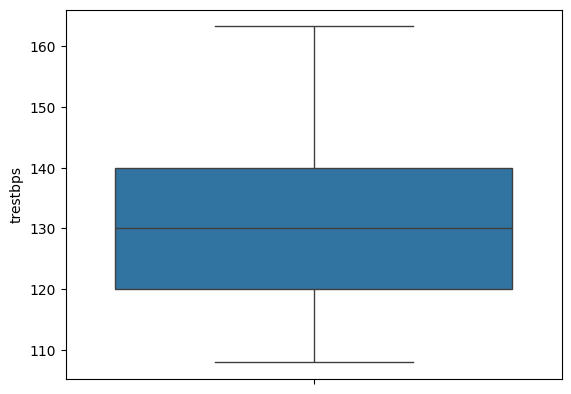

Batas Atas = 170.0
Batas Bawah = 90.0
Jumlah Outlier = 0
[]


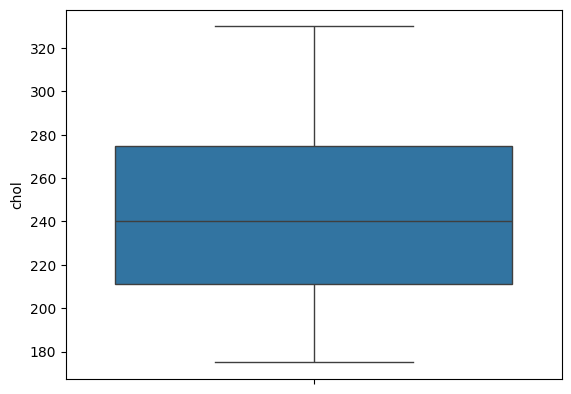

Batas Atas = 371.0
Batas Bawah = 115.0
Jumlah Outlier = 0
[]


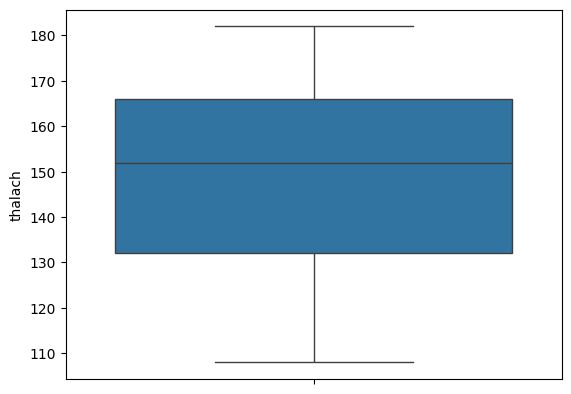

Batas Atas = 217.0
Batas Bawah = 81.0
Jumlah Outlier = 0
[]


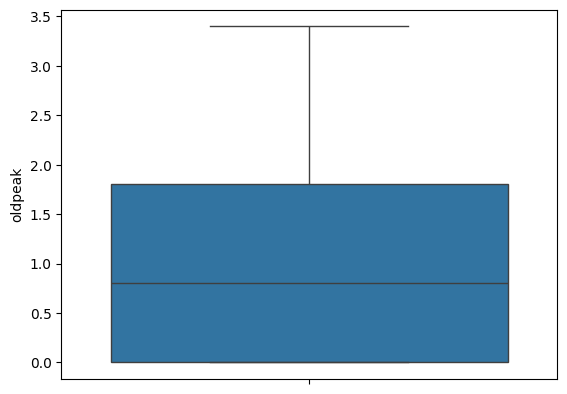

Batas Atas = 4.5
Batas Bawah = -2.7
Jumlah Outlier = 0
[]


In [ ]:
#Mengecek kembali outlier pada data yang baru
detect_outliers(data_clean)

In [ ]:
#Mengganti data awal dengan data baru yang sudah tidak ada outliernya
heart1 = heart.copy()
heart1.loc[:, heart1.columns.isin(data_clean)] = data_clean
heart1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,175,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,108,0,1.9,1,3,2,0


##B. Normalization

Normalisasi kali ini hanya akan dilakukan untuk kolom yang berisi data numerik. Sedangkan untuk kolom yang berisi data kategorik sudah dalam bentuk label encoding, sehingga tidak diperlukan feature encoding.

In [ ]:
data_num = heart1[['age', 'trestbps', 'chol', 'oldpeak', 'thalach']]
data_cat = heart1[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']]

In [ ]:
#Data kategori sudah dalam bentuk label encoding
data_cat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,0,0,1,0,2,2,3,0
1,1,0,1,0,1,0,0,3,0
2,1,0,0,1,1,0,0,3,0
3,1,0,0,1,0,2,1,3,0
4,0,0,1,1,0,1,3,2,0


**Keterangan:** Kolom-kolom tersebut sudah dalam bentuk label encoding, sehingga tidak diperlukan feature encoding.

In [ ]:
# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns = scaler.feature_names_in_)
data_num_scaled.head()

,age,trestbps,chol,oldpeak,thalach
0,0.479167,0.307971,0.238710,0.294118,0.810811
1,0.500000,0.579710,0.180645,0.911765,0.635135
2,0.854167,0.670290,0.000000,0.764706,0.229730
3,0.666667,0.724638,0.180645,0.000000,0.716216
4,0.687500,0.543478,0.767742,0.558824,0.000000


In [ ]:
data_num_scaled.describe()

,age,trestbps,chol,oldpeak,thalach
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.421322,0.450190,0.304218,0.558972
std,0.189006,0.277534,0.283042,0.315557,0.287753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.217391,0.232258,0.000000,0.324324
50%,0.562500,0.398551,0.419355,0.235294,0.594595
75%,0.666667,0.579710,0.645161,0.529412,0.783784
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Menggabungkan kembali data heart
heart_final = pd.concat([data_num_scaled, data_cat], axis = 1)
heart_final.head()

,age,trestbps,chol,oldpeak,thalach,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.479167,0.307971,0.238710,0.294118,0.810811,1,0,0,1,0,2,2,3,0
1,0.500000,0.579710,0.180645,0.911765,0.635135,1,0,1,0,1,0,0,3,0
2,0.854167,0.670290,0.000000,0.764706,0.229730,1,0,0,1,1,0,0,3,0
3,0.666667,0.724638,0.180645,0.000000,0.716216,1,0,0,1,0,2,1,3,0
4,0.687500,0.543478,0.767742,0.558824,0.000000,0,0,1,1,0,1,3,2,0


In [ ]:
heart_final.shape

(1025, 14)

##C. Splitting Data

In [ ]:
X = heart_final.drop(columns=['target'])
y = heart_final['target']

In [ ]:
#Membagi dataset menjadi data training (80%) dan data testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(820, 13)

In [ ]:
X_test.shape

(205, 13)

##D. Imbalance Data

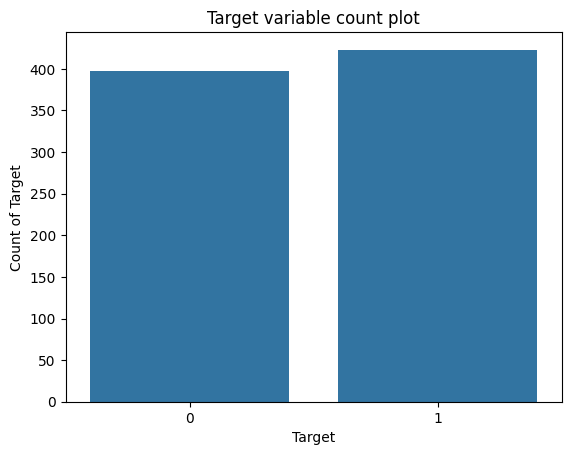

In [ ]:
sns.countplot(x=y_train)
plt.xlabel("Target")
plt.ylabel("Count of Target")
plt.title("Target variable count plot")
plt.show()

In [ ]:
y_train.value_counts()

target
1    423
0    397
Name: count, dtype: int64

**Interprestasi**: Berdasarkan output, diketahui bahwa data `target` dengan kode 1 sejumlah 423 data dan kode 0 sejumlah 397 data. Perbedaan jumlah dari kedua kode tersebut cukup kecil atau sekitar 5.13%, sedangkan apabila dilihat dari Bar-Plot diatas terlihat relatif seimbang atau **balance**. Oleh karena itu tidak diperlukan penanganan imbalance data.

##E. Feature Selection

Pada *feature selection* ini akan diperiksa korelasi setiap fitur untuk memilih fitur-fitur yang relevan.  Fitur yang memiliki nilai korelasi lebih besar dari 0,7 atau lebih kecil dari -0,7 akan dihilangkan atau dibuang.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr = X_train.corr(method = 'spearman')

<Axes: >

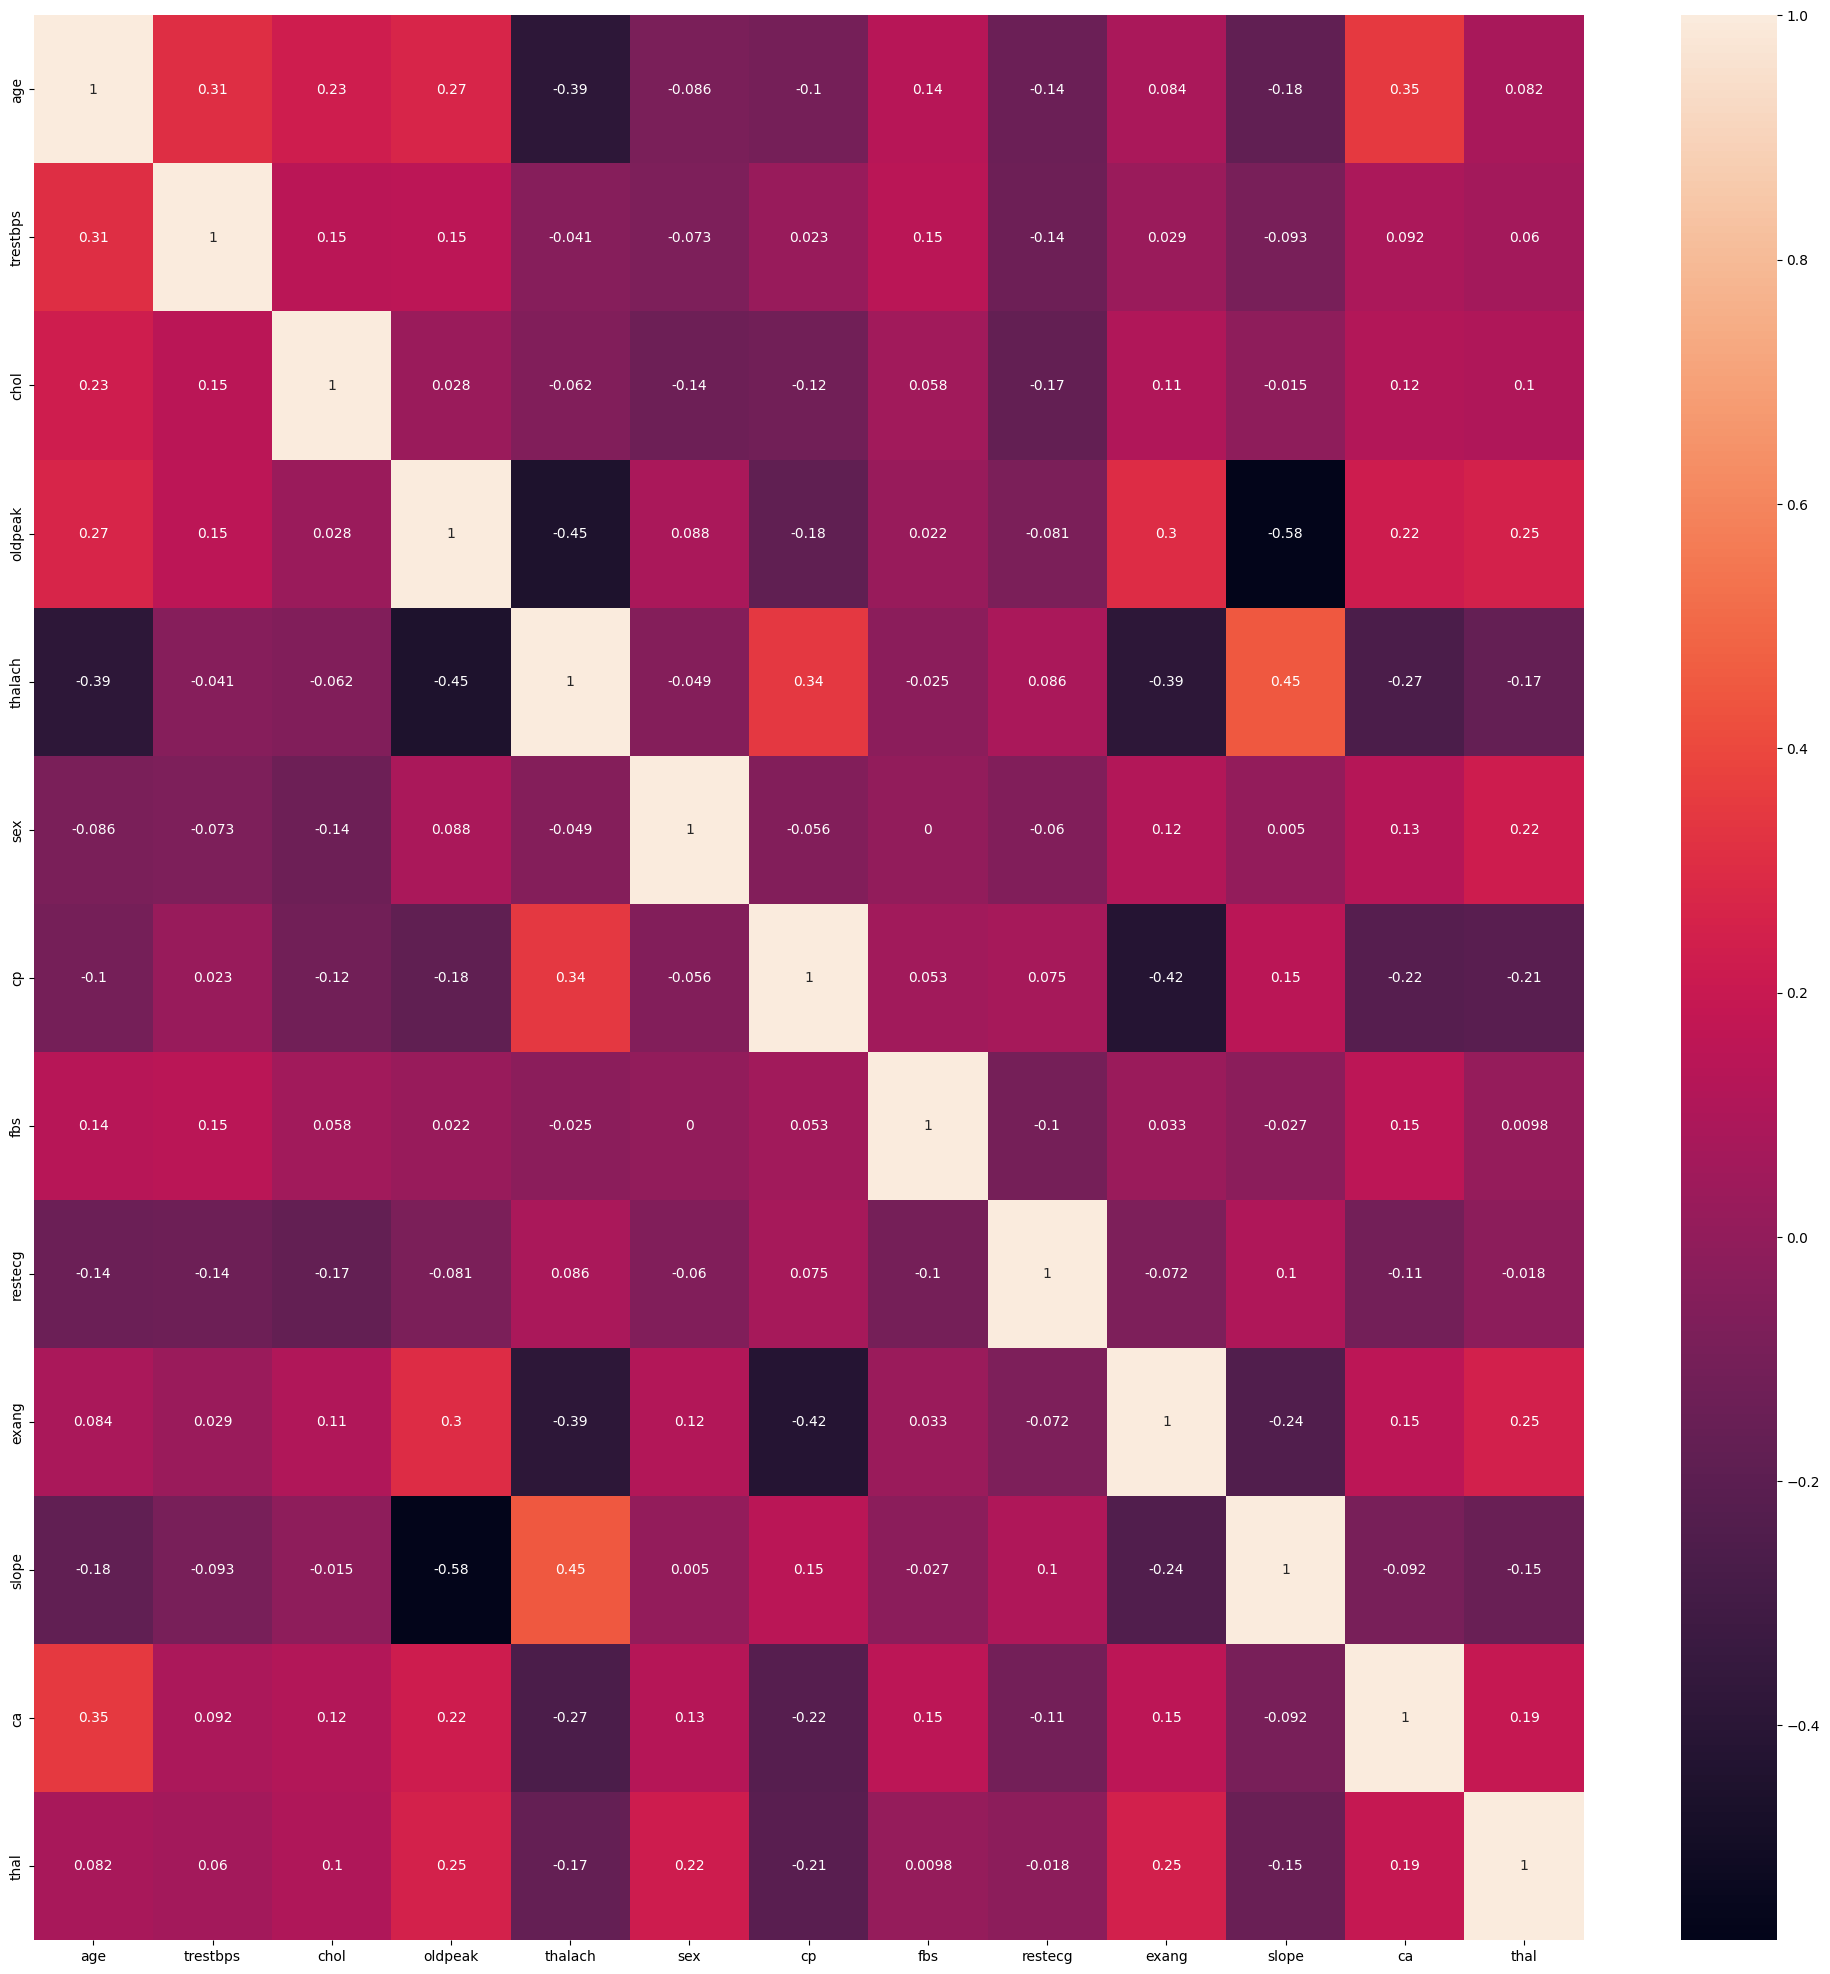

In [ ]:
#Melihat Korelasi antar fitur
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

**Interprestasi:** Berdasarkan output di atas dapat dilihat bahwa seluruh fitur memiliki nilai akurasi dalam rentang -0.7 < accuracy < 0.7, sehingga tidak ada fitur yang dihilangkan.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
#Menyeleksi fitur dengan mempertimbangkan tinggi rendahnya nilai korelasi
var = []
drop = []
for x in X_train.columns:
  for y in X_train.columns:
    if x != y:
      if [y,x] not in var:
        corr, p_value = spearmanr(X_train[x], X_train[y])
        var.append([x, y])
        if (corr <= -0.7) | (corr >= 0.7):
          if p_value < 0.05:
            drop.append(y)

In [ ]:
drop

[]

**Interprestasi:** Output kosong tersebut menunjukan bahwa tidak ada fitur yang perlu dihilangkan karena semua fitung memiliki nilai akurasi dalam rentang -0.7 < accuracy < 0.7.

#**Machine Learning Model**

##1.  Determinasi machine learning model yang relevan

Berikut adalah beberapa model machine learning yang relevan dengan dataset Heart Diseases: Decision Trees, Random Forest, Support Vector Machines (SVM), dan Logistic Regression. Oleh karena itu, prediksi dan evaluasi akan dilakukan pada model-model tersebut untuk menentukan model yang paling relevan atau terbaik.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import time
#Untuk menghitung waktu yang dibutuhkan dalam proses pelatihan model sebagai salah satu pertimbangan dalam menentukan model
import time


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
time1 = time.time()
dt.fit(X_train, y_train)
time2 = time.time()
dt_time = time2 - time1
print(dt_time)

0.011815786361694336


In [ ]:
#Random Forest
rf = RandomForestClassifier()
time1 = time.time()
rf.fit(X_train, y_train)
time2 = time.time()
rf_time = time2 - time1
print(rf_time)

0.19686341285705566


In [ ]:
#Support Vector Machine
svm = SVC()
time1 = time.time()
svm.fit(X_train, y_train)
time2 = time.time()
svm_time = time2 - time1
print(svm_time)

0.020462989807128906


In [ ]:
#Logistic Regression
lr = LogisticRegression()
time1 = time.time()
lr.fit(X_train, y_train)
time2 = time.time()
lr_time = time2 - time1
print(lr_time)

0.02641582489013672


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import time

In [ ]:
def confusion_mat(real_values,pred_values):
   CM = confusion_matrix(real_values,pred_values)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   accuracy   = round( (TP+TN) / Population,4)
   precision  = round( TP / (TP+FP),4 )
   npv        = round( TN / (TN+FN),4 )
   recall     = round( TP / (TP+FN),4 )
   tnr        = round( TN / (TN+FP),4 )
   f1score   = round( 2 * ((precision*recall)/(precision+recall)),4)
   return precision, recall, tnr, npv, f1score, accuracy

In [ ]:
def metric_func(y, x, estimator, label, time_training):
  precision, recall, tnr, npv, f1score, accuracy = confusion_mat(y, estimator.predict(x))
  data = [[precision, recall, tnr, npv, f1score, accuracy, time_training]]
  df = pd.DataFrame(data, columns = ['precision', 'recall', 'tnr', 'npv', 'f1score', 'accuracy', 'time_training'], index = [label])
  return df

In [ ]:
def merge(a):
  b = pd.DataFrame()
  for x in a:
    b = pd.concat([b, x], axis=0)
  print(b)

In [ ]:
merge([
    metric_func(y_train, X_train, dt, 'dt_train', dt_time),
    metric_func(y_test, X_test, dt, 'dt_test', dt_time),
    metric_func(y_train, X_train, rf, 'rf_train', rf_time),
    metric_func(y_test, X_test, rf, 'rf_test', rf_time),
    metric_func(y_train, X_train, svm, 'svm_train', svm_time),
    metric_func(y_test, X_test, svm, 'svm_test', svm_time),
    metric_func(y_train, X_train, lr, 'lr_train', lr_time),
    metric_func(y_test, X_test, lr, 'lr_test', lr_time),
])

           precision  recall     tnr     npv  f1score  accuracy  time_training
dt_train      1.0000  1.0000  1.0000  1.0000   1.0000    1.0000       0.011816
dt_test       1.0000  0.9709  1.0000  0.9714   0.9852    0.9854       0.011816
rf_train      1.0000  1.0000  1.0000  1.0000   1.0000    1.0000       0.196863
rf_test       1.0000  0.9709  1.0000  0.9714   0.9852    0.9854       0.196863
svm_train     0.9095  0.9504  0.8992  0.9444   0.9295    0.9256       0.020463
svm_test      0.8435  0.9417  0.8235  0.9333   0.8899    0.8829       0.020463
lr_train      0.8530  0.9054  0.8338  0.8922   0.8784    0.8707       0.026416
lr_test       0.7750  0.9029  0.7353  0.8824   0.8341    0.8195       0.026416


**Interprestasi:** Berdasarkan output di atas, terdapat dua model machine learning dengan tingkat akurasi tertinggi yaitu Decision Tree dan Random Forest. Pada studi kasus ini, model machine learning yang dipilih adalah **Random Forest**.

##2. Alasan penggunaan machine learning model machine learning

Penentuan model kali ini dilakukan dengan mempertimbangkan tujuan analisis dan nilai accuracy untuk mengevaluasi kinerja model. Berdasarkan output pada poin 1, terlihat bahwa model Random Forest (rf) memiliki nilai akurasi yang sempurna (1.0000) pada data train dan memiliki akurasi yang tinggi (0.9854) pada data test dengan waktu pelatihan model yang relatif singkat. Selain itu random forest memiliki nilai precision, recall, tnr, nvp, dan f1score yang cukup tinggi, hal ini menunjukkan bahwa model memiliki kemampuan yang baik dalam melakukan klasifikasi dengan benar, baik untuk kelas positif maupun negatif. Oleh karena itu, pada studi kasus ini model machine learning yang dipilih adalah **Random Forest**.

Berikut alasan dipilihnya model Random Forest dibandingkan dengan Decision Tree, diantaranya:
1. **Mengatasi Overfitting:** Random Forest cenderung memiliki kemampuan generalisasi yang lebih baik daripada Decision Tree karena mampu mengurangi overfitting. Dengan menggunakan teknik bootstrap aggregating (bagging) dan pemilihan fitur acak, Random Forest dapat mengurangi varians dalam model dan meningkatkan generalisasi pada data baru.
2. **Stabilitas:** Random Forest cenderung lebih stabil karena Random Forest menggabungkan beberapa pohon keputusan yang independen serta memiliki kemampuan yang lebih baik untuk menangani noise dan variasi dalam data, sehingga menghasilkan prediksi yang lebih konsisten dan andal.
3. **Penanganan Data Kompleksr:** Random Forest mampu menangani data yang lebih kompleks dengan banyak fitur dibandingkan Decision Tree. Hal ini karena Random Forest dapat memilih fitur yang paling relevan untuk prediksi, sehingga model lebih efisien dan efektif.
4. **Toleransi terhadap Data yang Tidak Seimbang:** Random Forest dapat bekerja dengan baik pada dataset yang tidak seimbang. Dalam Random Forest, pengambilan sampel acak dan pembobotan kelas dapat digunakan untuk mengurangi efek ketidakseimbangan data dan menghasilkan prediksi yang lebih akurat untuk kelas yang kurang representatif.

##3. Eksekusi coding machine learning model yang telah ditentukan

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Membangun model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Mengukur kepentingan fitur
rf.feature_importances_

array([0.08608111, 0.06837294, 0.07618576, 0.11723033, 0.11755838,
       0.03168284, 0.15058213, 0.00827117, 0.02064065, 0.04118758,
       0.04494299, 0.12013233, 0.11713178])

In [ ]:
X.columns

Index(['age', 'trestbps', 'chol', 'oldpeak', 'thalach', 'sex', 'cp', 'fbs',
       'restecg', 'exang', 'slope', 'ca', 'thal'],
      dtype='object')

**Interprestasi:**  

Setiap fitur memiliki kontribusi yang berbeda dalam membuat prediksi pada model Random Forest. Jika dilihat dari output diatas maka dapat diketahui bahwa semua fitur memiliki kontribusi yang signifikan terhadap prediksi model Random Forest. Adapun fitur dengan tingkat penting tertinggi, yaitu fitur `cp`, sedangkan fitur dengan tingkat penting yang relatif rendah, yaitu `sex` dan `fbs`.

In [ ]:
#Melakukan prediksi pada data uji
y_predict = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
print(accuracy_score(y_test, y_predict))

0.9853658536585366


**Interprestasi:**

 * **Precision**: Diperoleh precision untuk kategori 0 adalah 0.97, yang berarti 97% dari prediksi model untuk pasien tanpa penyakit jantung (0) benar. Precision untuk kategori 1 adalah 1.00, yang berarti 100% dari prediksi model untuk pasien dengan penyakit jantung (1) benar.

 * **Recall**: Diperoleh nilai recall untuk kategori 0 adalah 1.00 yang menunjukkan bahwa model mampu mengidentifikasi semua pasien tanpa penyakit jantung (0) dengan benar. Nilai recall untuk kategori 1 adalah 0.97 yang menunjukan 97%  model mampu mengidentifikasi semua pasien dengan penyakit jantung (1) dengan benar

 * **F1-score**: Diperoleh nilai f1-score sempurna (0.99), menunjukkan keseimbangan yang baik antara precision dan recall.

 * **Support**: Kolom ini menunjukkan jumlah kasus yang berkategori 0 sebanyak 102 dan jumlah kasus berkategori 1 sebanyak 103.

 * **Accuracy**: Diperoleh nilai akurasi sebesar 0.99, yang menunjukkan bahwa model melakukan klasifikasi dengan baik untuk semua sampel.

 * **Macro avg**: Baris ini menunjukkan rata-rata precision, recall, dan F1-score di semua kelas, tanpa mempertimbangkan ketidakseimbangan kelas. Diperoleh nilainya sebesar 0.99.

 * **Weighted avg**: Baris ini menunjukkan rata-rata precision, recall, dan F1-score di semua kelas, ditimbang oleh jumlah instance sebenarnya untuk setiap kelas. Diperoleh nilainya sebesar 0.99.

##4. Cross-validation basic dari machine learning model yang telah dibuat

Cross validation merupakan teknik yang digunakan untuk mengevaluasi kinerja model machine learning. Dalam kasus ini dilakukan dengan **K-Fold Cross-Validation** dimana dataset dibagi menjadi k subset atau fold. Nilai k yang umum digunakan adalah 5 atau 10, namun pada studi kasus kali ini digunakan k=5 untuk menyesuaikan proporsi data training dan testing 80% : 20% (1/5).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Inisialisasi metode cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation
recall = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='recall')
precision = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='precision')
f1 = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='f1')
accuracy = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')

#Tampilkan hasil evaluasi
print(f'Cross Validation Accuracy Score: {accuracy}')
print(f'Cross Validation Precision Score: {precision}')
print(f'Cross Validation Recall Score: {recall}')
print(f'Cross Validation F1 Score: {f1}')
print()
print(f'Cross Validation Accuracy Mean: {round(accuracy.mean(), 4)}')
print(f'Cross Validation Precision Mean: {round(precision.mean(), 4)}')
print(f'Cross Validation Recall Mean: {round(recall.mean(), 4)}')
print(f'Cross Validation F1 Mean: {round(f1.mean(), 4)}')

Cross Validation Accuracy Score: [0.99390244 0.95121951 0.98780488 0.99390244 0.95731707]
Cross Validation Precision Score: [0.98823529 0.91954023 0.98809524 0.98863636 0.95505618]
Cross Validation Recall Score: [1.         0.98765432 0.98795181 0.97701149 0.96590909]
Cross Validation F1 Score: [0.99408284 0.95857988 0.98795181 0.98265896 0.97142857]

Cross Validation Accuracy Mean: 0.9768
Cross Validation Precision Mean: 0.9679
Cross Validation Recall Mean: 0.9837
Cross Validation F1 Mean: 0.9789


In [ ]:
cross_val_rf = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
cross_val_rf

array([0.99390244, 0.94512195, 0.98780488, 0.98170732, 0.95731707])

##5. Menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya

Cross-validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja dari sebuah model machine learning. Dimana, pada output di atas, **Cross-Validation Scores** merupakan array nilai akurasi dari setiap lipatan saat melakukan cross-validation. Setiap angka dalam array mewakili akurasi model pada setiap lipatan yang berbeda, semakin mendekati 1 skor pada cross validation menunjukan model berkinerja semakin baik dan mampu memprediksi data dengan benar.

**Hasil:**
- Cross Validation Accuracy Score merupakan proporsi dari jumlah prediksi yang benar dibagi dengan jumlah total data. Semakin tinggi skornya, semakin baik kinerja model. Berdasarkan output di atas nampak bahwa kinerja model tergolong akurat, karena nilai akurasi pada ke 5 folds cukup besar (mendekati 1) dan relatif konsisten.

- Cross Validation Precision Score mengukur seberapa banyak dari prediksi positif yang sebenarnya positif. Ini adalah rasio dari jumlah prediksi positif yang benar dibagi dengan total jumlah prediksi positif. Semakin tinggi skornya, semakin baik kinerja model. Berdasarkan output di atas nampak bahwa kinerja model tergolong presisi, karena nilai presisi pada ke 5 folds cukup besar (mendekati 1) dan relatif konsisten.

- Cross Validation Recall Score (atau juga dikenal sebagai Sensitivity) mengukur seberapa banyak dari total positif yang berhasil diidentifikasi oleh model. Ini adalah rasio dari jumlah prediksi positif yang benar dibagi dengan total jumlah positif yang ada dalam data. Semakin tinggi skornya, semakin baik kinerja model. Berdasarkan output di atas nampak bahwa kinerja model tergolong baik, karena nilai recall pada ke 5 folds cukup besar (mendekati 1) dan relatif konsisten.

- Cross Validation F1 Score merupakan ukuran gabungan dari precision dan recall. Semakin tinggi skornya, semakin baik keseimbangan antara precision dan recall. Berdasarkan output di atas nampak bahwa kinerja model tergolong seimbang antara precision dan recall, karena nilai F1 pada ke 5 folds cukup besar (mendekati 1) dan relatif konsisten.

- Model memiliki rata-rata dari nilai-nilai akurasi validasi silang untuk setiap lipatan (fold) sebesar 0,9768; rata-rata dari nilai-nilai presisi validasi silang untuk setiap lipatan (fold) sebesar 0.9679; rata-rata dari nilai-nilai recall validasi silang untuk setiap lipatan (fold) sebesar 0,9837; dan rata-rata dari nilai-nilai F1 validasi silang untuk setiap lipatan (fold) sebesar 0,9789.

Jadi, dapat disimpulkan berdasarkan cross validation di atas, model Random Forest tergolong baik untuk diterapkan pada dataset heart disease ini. Selain itu diperoleh nilai rata-rata akurasi sebesar 0.9768292682926829. Hal ini mengindikasikan bahwa **model Random Forest yang digunakan memiliki tingkat akurasi yang tinggi** dalam memprediksi kemungkinan pasien terkena penyakit jantung dan hasil tersebut relatif konsisten di seluruh lipatan cross-validation yang digunakan.

##6. Menerapkan learning curves dari machine learning model yang telah dibuat

In [ ]:
# Mendefinisikan fungsi untuk menampilkan learning curve
def learning_curve_classification(model, X, y, kf, metric):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=kf, scoring=metric, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.subplots(1, figsize=(10, 5))
    plt.plot(train_sizes, train_mean,  label="Training score")
    plt.plot(train_sizes, test_mean, label="Validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="azure")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="navajowhite")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(f"{metric} Score")
    plt.ylim(0,1.2)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

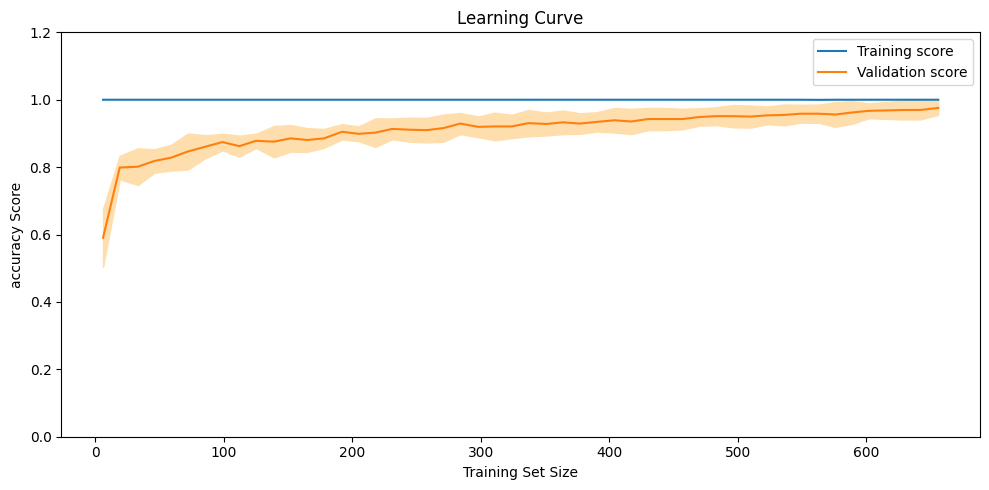

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

learning_curve_classification(rf, X_train, y_train, kfold, metric='accuracy')

Pada grafik Learning Curve untuk cross validation dengan 5 fold diperoleh skor akurasi model pada training score tetap berada di akurasi 100% (1.00). Sedangkan untuk validation score semakin meningkat dan konvergen menuju 1 (mendekati training curve) seiring dengan bertambahnya sampel pada data.

##7. Menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan

Learning curve adalah grafik yang menunjukkan bagaimana kinerja model berubah seiring dengan penambahan jumlah data train yang digunakan untuk melatih model tersebut. Berikut ciri-ciri learning curve dari model machine learning dengan performa baik (good fit):
1. Nilai akurasi/error dari training dan validation berdekatan.
2. Nilai akurasi validation kurang dari nilai akurasi training.
3. Kurva meningkat secara signifikan di awal iterasi dan mencapai garis yang stabil pada satu titik.


**Interprestasi:**

Berdasarkan grafik Learning Curve yang diperoleh pada poin 6 dapat diketahui bahwa:
1. Training curve dan validation curve terletak saling berdekatan dimana nilai akurasi dari validation curve semakin meningkat mendekati training curve.
2. Nilai akurasi pada validation curve kurang dari nilai akurasi training curve yang ditandai dengan validation curve selalu berada di bawah training curve.
3. Validation curve menunjukan peningkatan yang signifikan pada tahap awal (memiliki nilai akurasi yang semakin meningkat) dan mencapai garis yang stabil atau konvergen mendekati 1 seiring bertambahnya sampel data.

Oleh karena itu, dapat disimpulkan bahwa model **Random Forest Classifier yang dibangun memiliki performa good fit** yang ditandai dengan bentuk learning curve yang sesuai dengan learning curve yang dimiliki oleh model dengan performa good fit.

##8. Optimalisasi Model: Hyperparameter Tuning dan Bootstrapping jika ada

Penggunaan teknik boostrapping mungkin tidak diperlukan pada studi kasus ini. Hal ini dikarenakan Random Forest sendiri sudah mengimplementasikan konsep "bootstrap aggregating" atau "bagging" secara internal. Bagging adalah teknik yang digunakan dalam Random Forest di mana setiap pohon keputusan (decision tree) dalam ensemble dibangun menggunakan sampel acak dari data pelatihan, yang dipilih dengan penggantian (bootstrap). Hal ini memungkinkan setiap pohon memiliki variasi dalam pembangunan, meningkatkan kemampuan ensemble untuk menangani overfitting dan meningkatkan performa prediksi. Oleh karena itu, dalam pengoptimasian model random forest kali ini hanya dilakukan dengan hyperparameter tuning. Hyperparameter tuning adalah proses mencari nilai optimal untuk hyperparameter pada model machine learning untuk meningkatkan performanya.

In [ ]:
#Daftar parameter dari Random Forest Classifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Reference:** [sklearn.ensemble.RandomForestClassifier](https://)

Beberapa parameter yang perlu dipertimbangkan untuk tuning pada model Random Forest antara lain:
1. **n_estimators**: jumlah pohon dalam ensemble. Meningkatkan nilai ini akan meningkatkan akurasi model, tetapi juga akan meningkatkan waktu training dan kompleksitas model.
2. **max_depth**: kedalaman maksimum dari setiap pohon dalam ensemble. Nilai yang lebih tinggi memungkinkan pohon untuk belajar lebih kompleks, tetapi juga meningkatkan risiko overfitting.
3. **min_samples_split**: jumlah sampel minimum yang diperlukan untuk membagi simpul dalam pohon. Nilai yang lebih tinggi dapat membantu mencegah overfitting, tetapi nilai yang terlalu tinggi juga dapat menyebabkan underfitting.
4. **min_samples_leaf**: jumlah sampel minimum yang diperlukan untuk menjadi simpul terminal. Memperbesar nilai ini dapat membantu mengurangi kompleksitas model dan mencegah overfitting.
5.**max_features**: jumlah fitur yang dipertimbangkan untuk mencari split terbaik dalam setiap simpul. Memilih jumlah fitur yang lebih kecil dapat membantu mengurangi varians dan meningkatkan generalisasi model.
6. **criterion**: Berfungsi untuk mengukur kualitas split.

Adapun metode tunning yang akan digunakan pada kasus ini yaitu Grid search.

In [ ]:
# Menentukan daftar parameter yang ingin dicoba
parameter = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

###8.1. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(
    estimator=rf,
    param_grid=parameter,
    scoring = 'accuracy',
    cv = kfold,
    refit = True,
    return_train_score = True
  ).fit(X_train, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150)

Best parameter yang dihasilkan melalui hyperparameter dengan menggunakan Grid Search, diantaranya:
* criterion= entropy
* max_depth= 20
* n_estimators= 150




In [ ]:
#Membangun model Random Forest dengan best parameter
rf_opt= RandomForestClassifier(criterion='entropy', max_depth= 20, n_estimators= 150)
rf_opt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150)

In [ ]:
#Cross-validation
cross_val_rf_opt = cross_val_score(rf_opt, X_train, y_train, cv=kfold, scoring='accuracy')
cross_val_rf_opt

array([0.99390244, 0.93292683, 0.98780488, 0.99390244, 0.9695122 ])

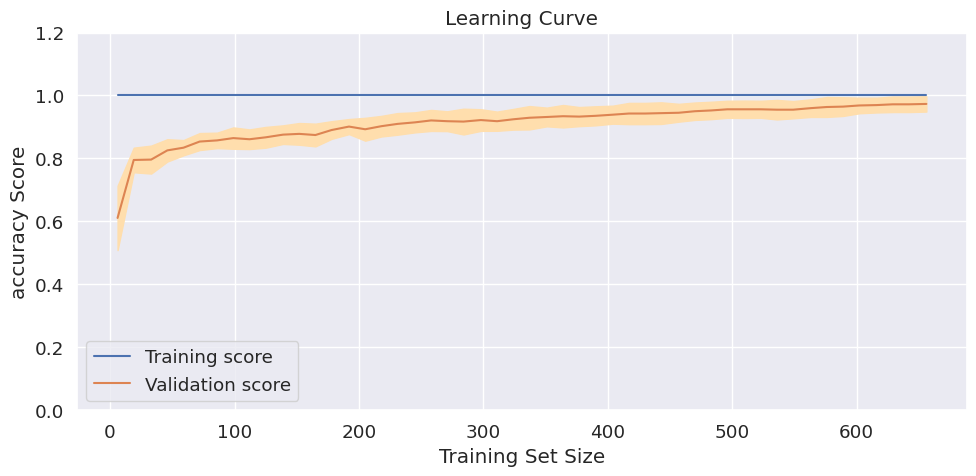

In [ ]:
#Learning curve
learning_curve_classification(rf_opt, X_train, y_train, kfold, metric='accuracy')

**Interprestasi:**

Berdasarkan grafik Learning Curve di atas, diketahui bahwa model setelah tuning menggunakan Grid Search memiliki performa good fit yang ditandai dengan training curve dan mencapai garis yang stabil atau konvergen mendekati 1 seiring bertambahnya sampel data.

###8.1 Hasil Hyperparameter Tuning

In [ ]:
data_comparison = pd.DataFrame({
    'Before Tuning Hyperparameter': cross_val_rf,
    'After Tuning Hyperparameter': cross_val_rf_opt,
})

data_comp_final = data_comparison.T
data_comp_final['mean'] = np.mean(data_comp_final, axis=1)
data_comp_final

,0,1,2,3,4,mean
Before Tuning Hyperparameter,0.993902,0.945122,0.987805,0.981707,0.957317,0.973171
After Tuning Hyperparameter,0.993902,0.932927,0.987805,0.993902,0.969512,0.975610


**Interprestasi:**

Berdasarkan output di atas, dapat disimpulkan bahwa model Random Forest Classifier sebelum dilakukan hyperparameter tuning telah menunjukkan kinerja yang sangat baik dengan rata-rata skor akurasi sebesar 0.973171. Setelah dilakukan hyperparameter tuning dengan menggunakan Grid Search, performa model tidak mengalami perubahan yang signifikan, masih mempertahankan rata-rata skor akurasi sebesar 0.975610. Oleh karena itu, dapat disimpulkan bahwa model Random Forest Classifier sebelum dan setelah dilakukan hyperparameter tuning memiliki performa yang baik, yang dinyatakan dari nilai akurasi yang mendekati 1 dan kurva yang sesuai dengan karakteristik model yang memiliki performa good fit.

##9.  Mengukur model yang dibuat dengan metric evaluation

Metrik evaluasi (evaluation metrics) adalah ukuran atau indikator yang digunakan untuk mengevaluasi kinerja atau performa model machine learning. Pemilihan metrik evaluasi yang tepat tergantung pada jenis masalah machine learning yang dihadapi, yaitu klasifikasi atau regresi. Pada studi kasus ini, digunakan model klasifikasi dengan Random Forest. Oleh karena itu, metrik evaluasi yang digunakan untuk mengevaluasi model meliputi precision, recall, f1-score, support, accuracy, dan confusion matrix.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

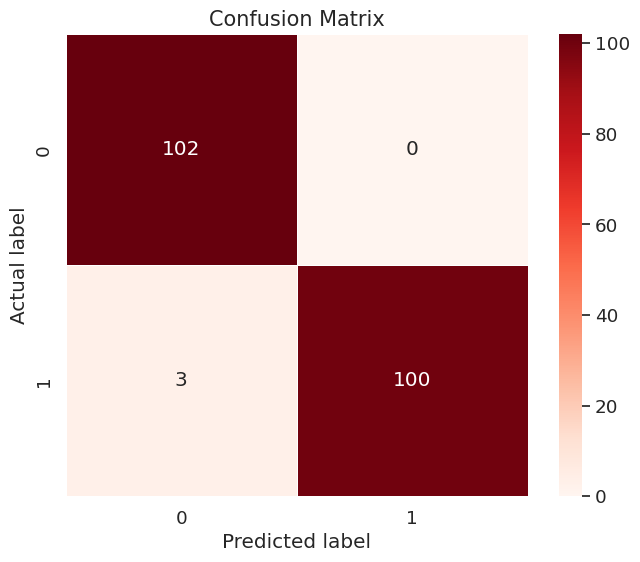

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy Score: 0.9853658536585366


In [ ]:
#Confusion Matrix
def confusion_mat(model):
    y_predict = model.predict(X_test)

    #Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap="Reds")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix', size=15)  # Menambahkan judul yang sesuai
    plt.show()

    print(classification_report(y_test, y_predict))
    print(f'Accuracy Score:',accuracy_score(y_test, y_predict))

confusion_mat(rf_opt)

#10. Interpretasi hasil metric evaluation

**Interpretasi Tampilan Confusion Matrix:**
* **Kolom True Negative**: Kolom ini menunjukkan bahwa 102 pasien yang sebenarnya tidak memiliki penyakit jantung diklasifikasikan dengan benar oleh model sebagai pasien yang tidak memiliki penyakit jantung.

* **Kolom False Negative**: Kolom ini menunjukkan bahwa tidak ada pasien (0) yang sebenarnya tidak memiliki penyakit jantung diklasifikasikan secara keliru oleh model sebagai paseien yang memiliki penyakit jantung.

* **Kolom False Positive**: Kolom ini menunjukkan bahwa 3 pasien yang sebenarnya memiliki penyakit jantung diklasifikasikan secara keliru oleh model sebagai pasien yang tidak memiliki penyakit jantung.

* **Kolom True Positive**: Kolom ini menunjukkan bahwa 100 pasien yang sebenarnya memiliki penyakit jantung diklasifikasikan dengan benar oleh model sebagai pasien yang memiliki penyakit jantung.

Berdasarkan nilai-nilai pada kolom-kolom tersebut, dapat dihitung beberapa metrik untuk mengevaluasi kinerja model, seperti accuracy, preccision, recall, dan F1-score. Namun Pada kasus kali ini, perhitungan-perhitungan tersebut dilakukan dengan bantuan fungsi classification_report yang tersedia di Python.

**Interprestasi:**

Berdasarkan output diatas dapat diketahui bahwa performa model sebelum dan sesudah dilakukan hyperparameter tunning tidak mengalami perubahan yang signifikan, sama-sama goodfit. Hal ini ditunjukan oleh besarnya nilai akurasi pada confusion matrix yang sama. Berikut interprestasi dari output metric evaluation diatas:

 * **Precision**:  Nilai ini menunjukkan rasio antara positif benar (true positive) dengan total prediksi positif. Diperoleh precision untuk kategori 0 adalah 0.97, yang berarti 97% dari prediksi model untuk pasien tanpa penyakit jantung (0) benar. Precision untuk kategori 1 adalah 1.00, yang berarti 100% dari prediksi model untuk pasien dengan penyakit jantung (1) benar.

 * **Recall**: Nilai ini menunjukkan rasio antara positif benar (true positive) dengan total kasus positif sebenarnya. Diperoleh nilai recall untuk kategori 0 adalah 1.00 yang menunjukkan bahwa model mampu mengidentifikasi semua pasien tanpa penyakit jantung (0) dengan benar. Nilai recall untuk kategori 1 adalah 0.97 yang menunjukan 97%  model mampu mengidentifikasi semua pasien dengan penyakit jantung (1) dengan benar

 * **F1-score**: Nilai ini menunjukkan keseimbangan antara precision dan recall. Diperoleh nilai f1-score sempurna (0.99), menunjukkan keseimbangan yang baik antara precision dan recall.

 * **Accuracy**: Diperoleh nilai akurasi sebesar 0.9853658536585366 atau 0.99, artinya model memprediksi kategori yang benar sebesar 98.5% dari total kategori yang ada dalam kumpulan data.

